# Explore settings for the Fourier expansion parameter nr

Section 1 - Import code and make definitions

Section 2 - View waveforms with different NR parameters - Vertical

Section 3 - View histogram

By introducing 3D heterogeneity to our models, we have significant energy propagating in the out-of-plane (meridional) direction. 
The AxiSEM3D parameter, \textit{NR}, allows us to adjust the order of the Fourier expansion. We use the value recommended for a moment tensor source and a 1D model ($\textit{NR} = 5$) for the 1D simulations. For 3D simulations, the required values of $\textit{NR}$ depend on the complexity of the wavefield we wish to simulate. We experimented to find acceptable values by testing one of the models with the deepest heterogeneities (M-3). We ran simulations with $\textit{NR} = 5$ (as a baseline), $\textit{NR} = 50$ and $\textit{NR} = 100$. We also tried $\textit{NR} = 200$ but ran into memory issues. \axi\ can search for the optimum $\textit{NR}$ up to a maximum value (we chose  $\textit{NR} = 100$). After a 900~s simulation nearly all points on the mesh reached 100. 
Therefore, we assume that the simulation ideally requires higher values than $\textit{NR} = 100$. We ran the 3D simulations at the largest value of $\textit{NR}$ which was available for our resources, which was $\textit{NR} = 100$. 

The largest differences are on the transverse component. If NR=5, there is no P-wave arrival on the transverse component and no scattering before the PS arrival. If NR=100, there is signficant scattered energy. 




## Section 1 - Import code and make definitions

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

In [1]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel

calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup

import matplotlib.pyplot as plt
import numpy as np
import time
import xarray as xr

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('input_files/local_MSEED/inventory.xml')

In [3]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


In [4]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
#ISSI M1
############################################################################

############################################################################
# specify a run name
run = '140a_nr5_ISSI_atten_linear80_2'
run_title = "Constant NR = 5"
short_title = "Constant NR = 5"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '140fw_n50constant_ISSI_atten_linear80_2'
run_title = "Constant NR = 50"
short_title = "Constant NR = 50"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
# this is the same as 140we_ISSI_atten_linear80_2, but with scanning=True
run = '140ew_n100constant_scan_ISSI_atten_linear80_2'
run_title = "Constant NR = 100"
short_title = "Constant NR = 100"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
print('Models read in')



Min/Max R -1.3302423 0.6772293
Min/Max T -1.4179916 1.2380098
Min/Max Z -0.0072662113 15.909162
Min/Max R -1.1720309 0.79269886
Min/Max T -2.2557237 2.258769
Min/Max Z -0.006813113 17.612532
Min/Max R -1.1722045 0.7918949
Min/Max T -2.1907291 2.260126
Min/Max Z -0.0052245823 17.614433
Models read in


## Section 2 - View waveforms with different NR parameters - Vertical

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 1.083983452729236e-05
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 1.4476808304791994e-05
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 1.1719703666478088e-05
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 57.67071530277473
Suppressing secondary arrivals
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:17.167918Z.png


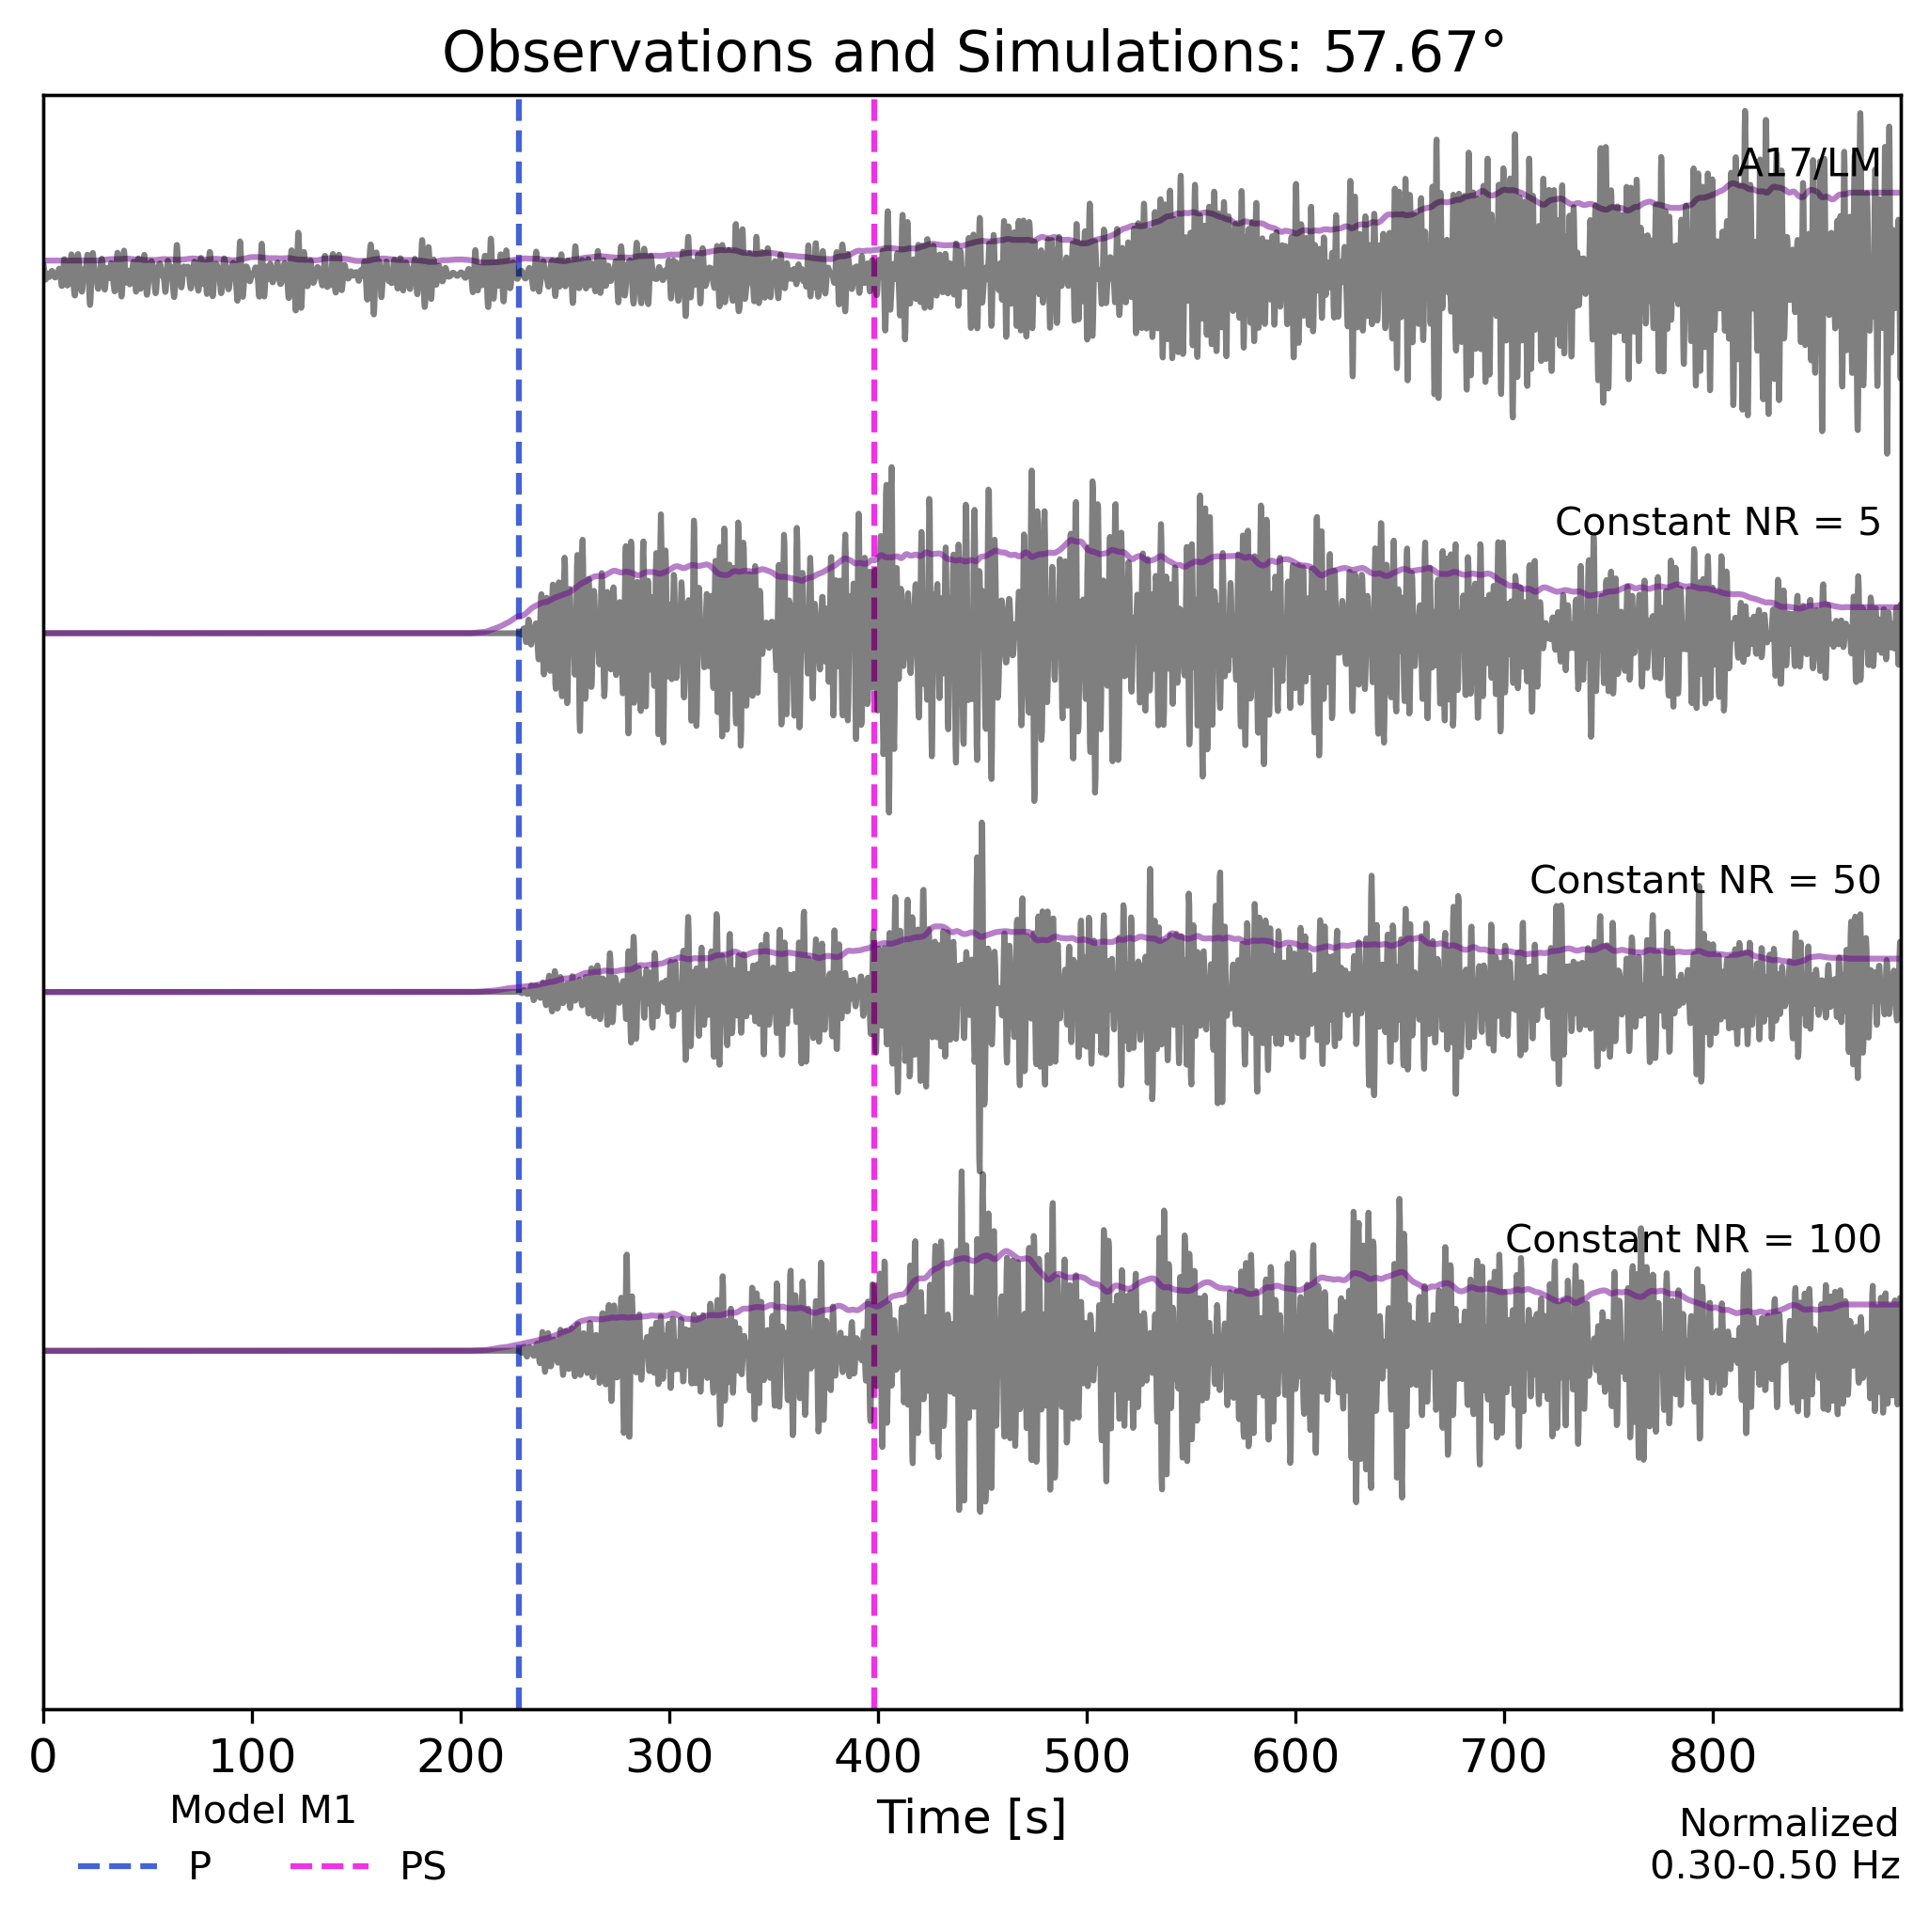

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 1.2418109666088705e-05
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 9.483586627162834e-06
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 1.0579619068628183e-05
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 28.047339965833054
Suppressing secondary arrivals
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:17.632166Z.png


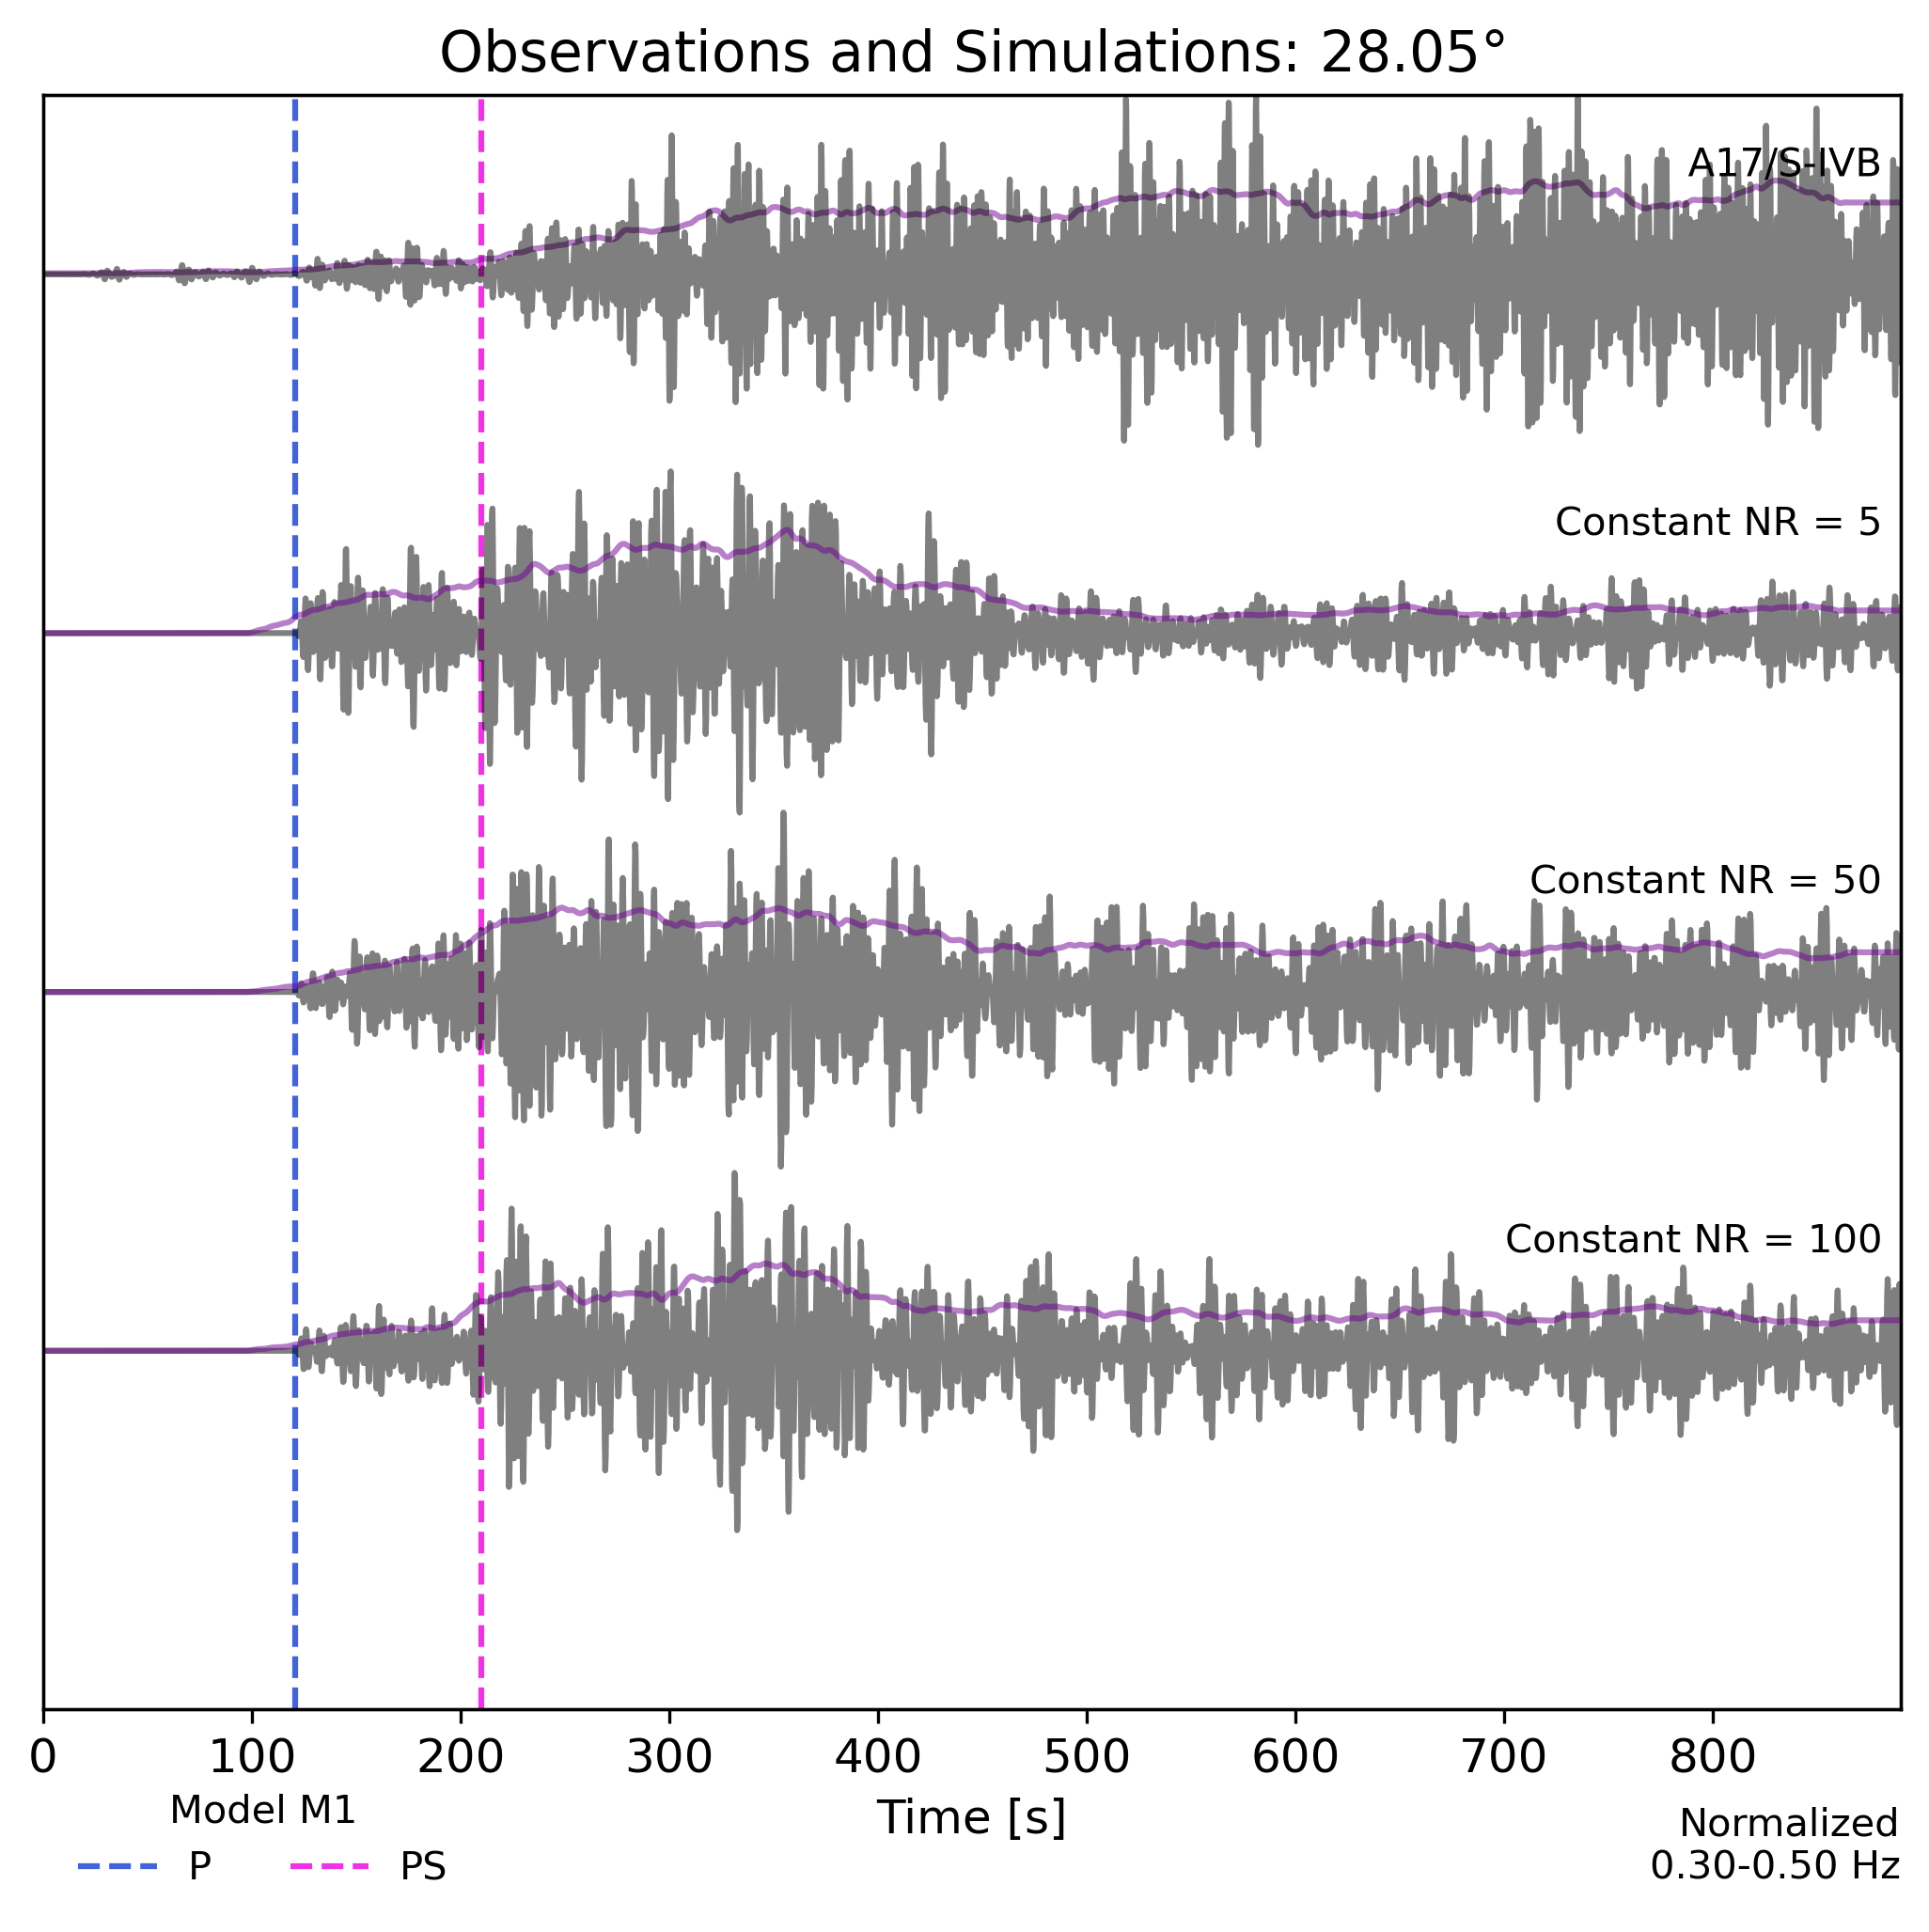

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0035532933259289842
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 0.0021593847151319037
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 0.0038569430560677536
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 2.167025997371414
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:18.070537Z.png


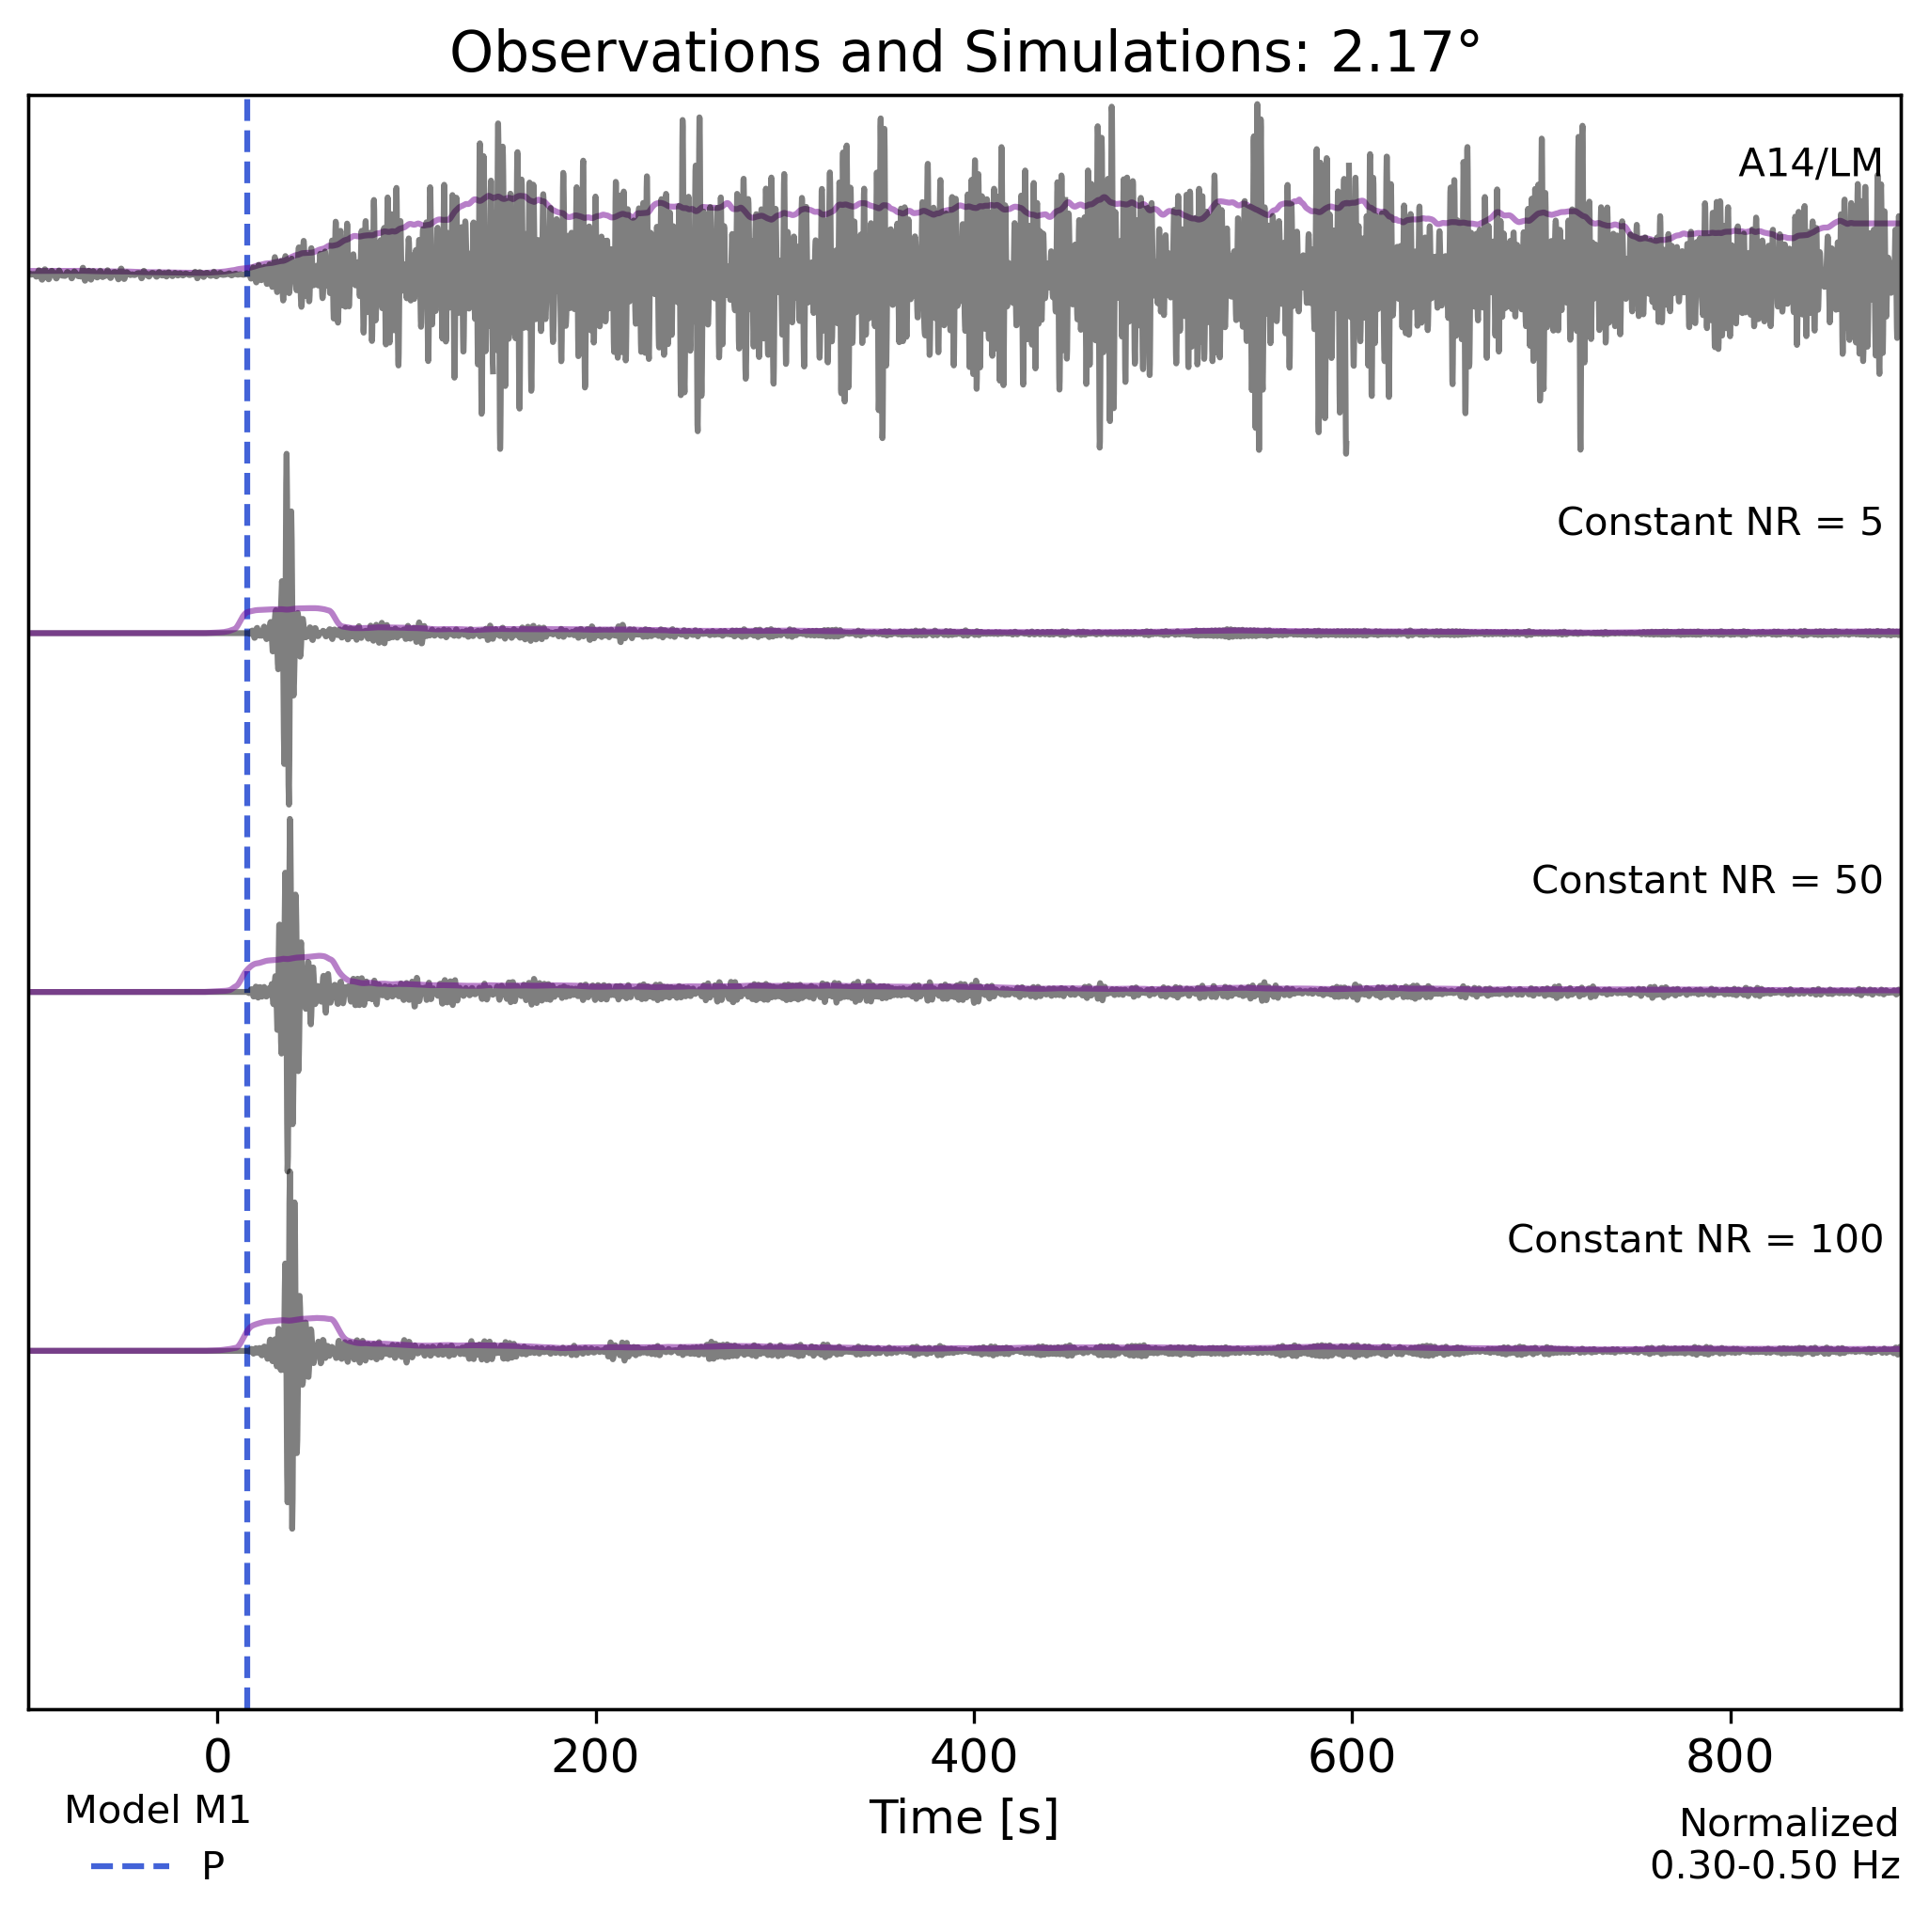

3 Trace(s) in Stream:
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples

In [5]:
# Compare NR simulations - Vertical

run_list = [
'140a_nr5_ISSI_atten_linear80_2', 
'140fw_n50constant_ISSI_atten_linear80_2', 
'140ew_n100constant_scan_ISSI_atten_linear80_2',
]

freqmin=0.3
freqmax=0.5


scale_list = None


# original_observation_stream_local_MH

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,
                    model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=890,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope_one_color=True,
                              annotate_relative=False,
                              save_fig=True,figsize=(7,7 )
                             )


plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=890,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,
                                           annotate_relative=False,
                           save_fig=True,figsize=(7,7 )
                             )


plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=890,channel='Z',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,
                              annotate_relative=False,
                              save_fig=True,figsize=(7,7 )
                             )




## Section 3 - View waveforms with different NR parameters - Transverse

Calculated using model :  Model M1
0 6.1407575074553936e-06
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 1.0519196713563098e-05
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 1.0622180347585889e-05
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 57.67071530277473
Suppressing secondary arrivals
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:18.463003Z.png


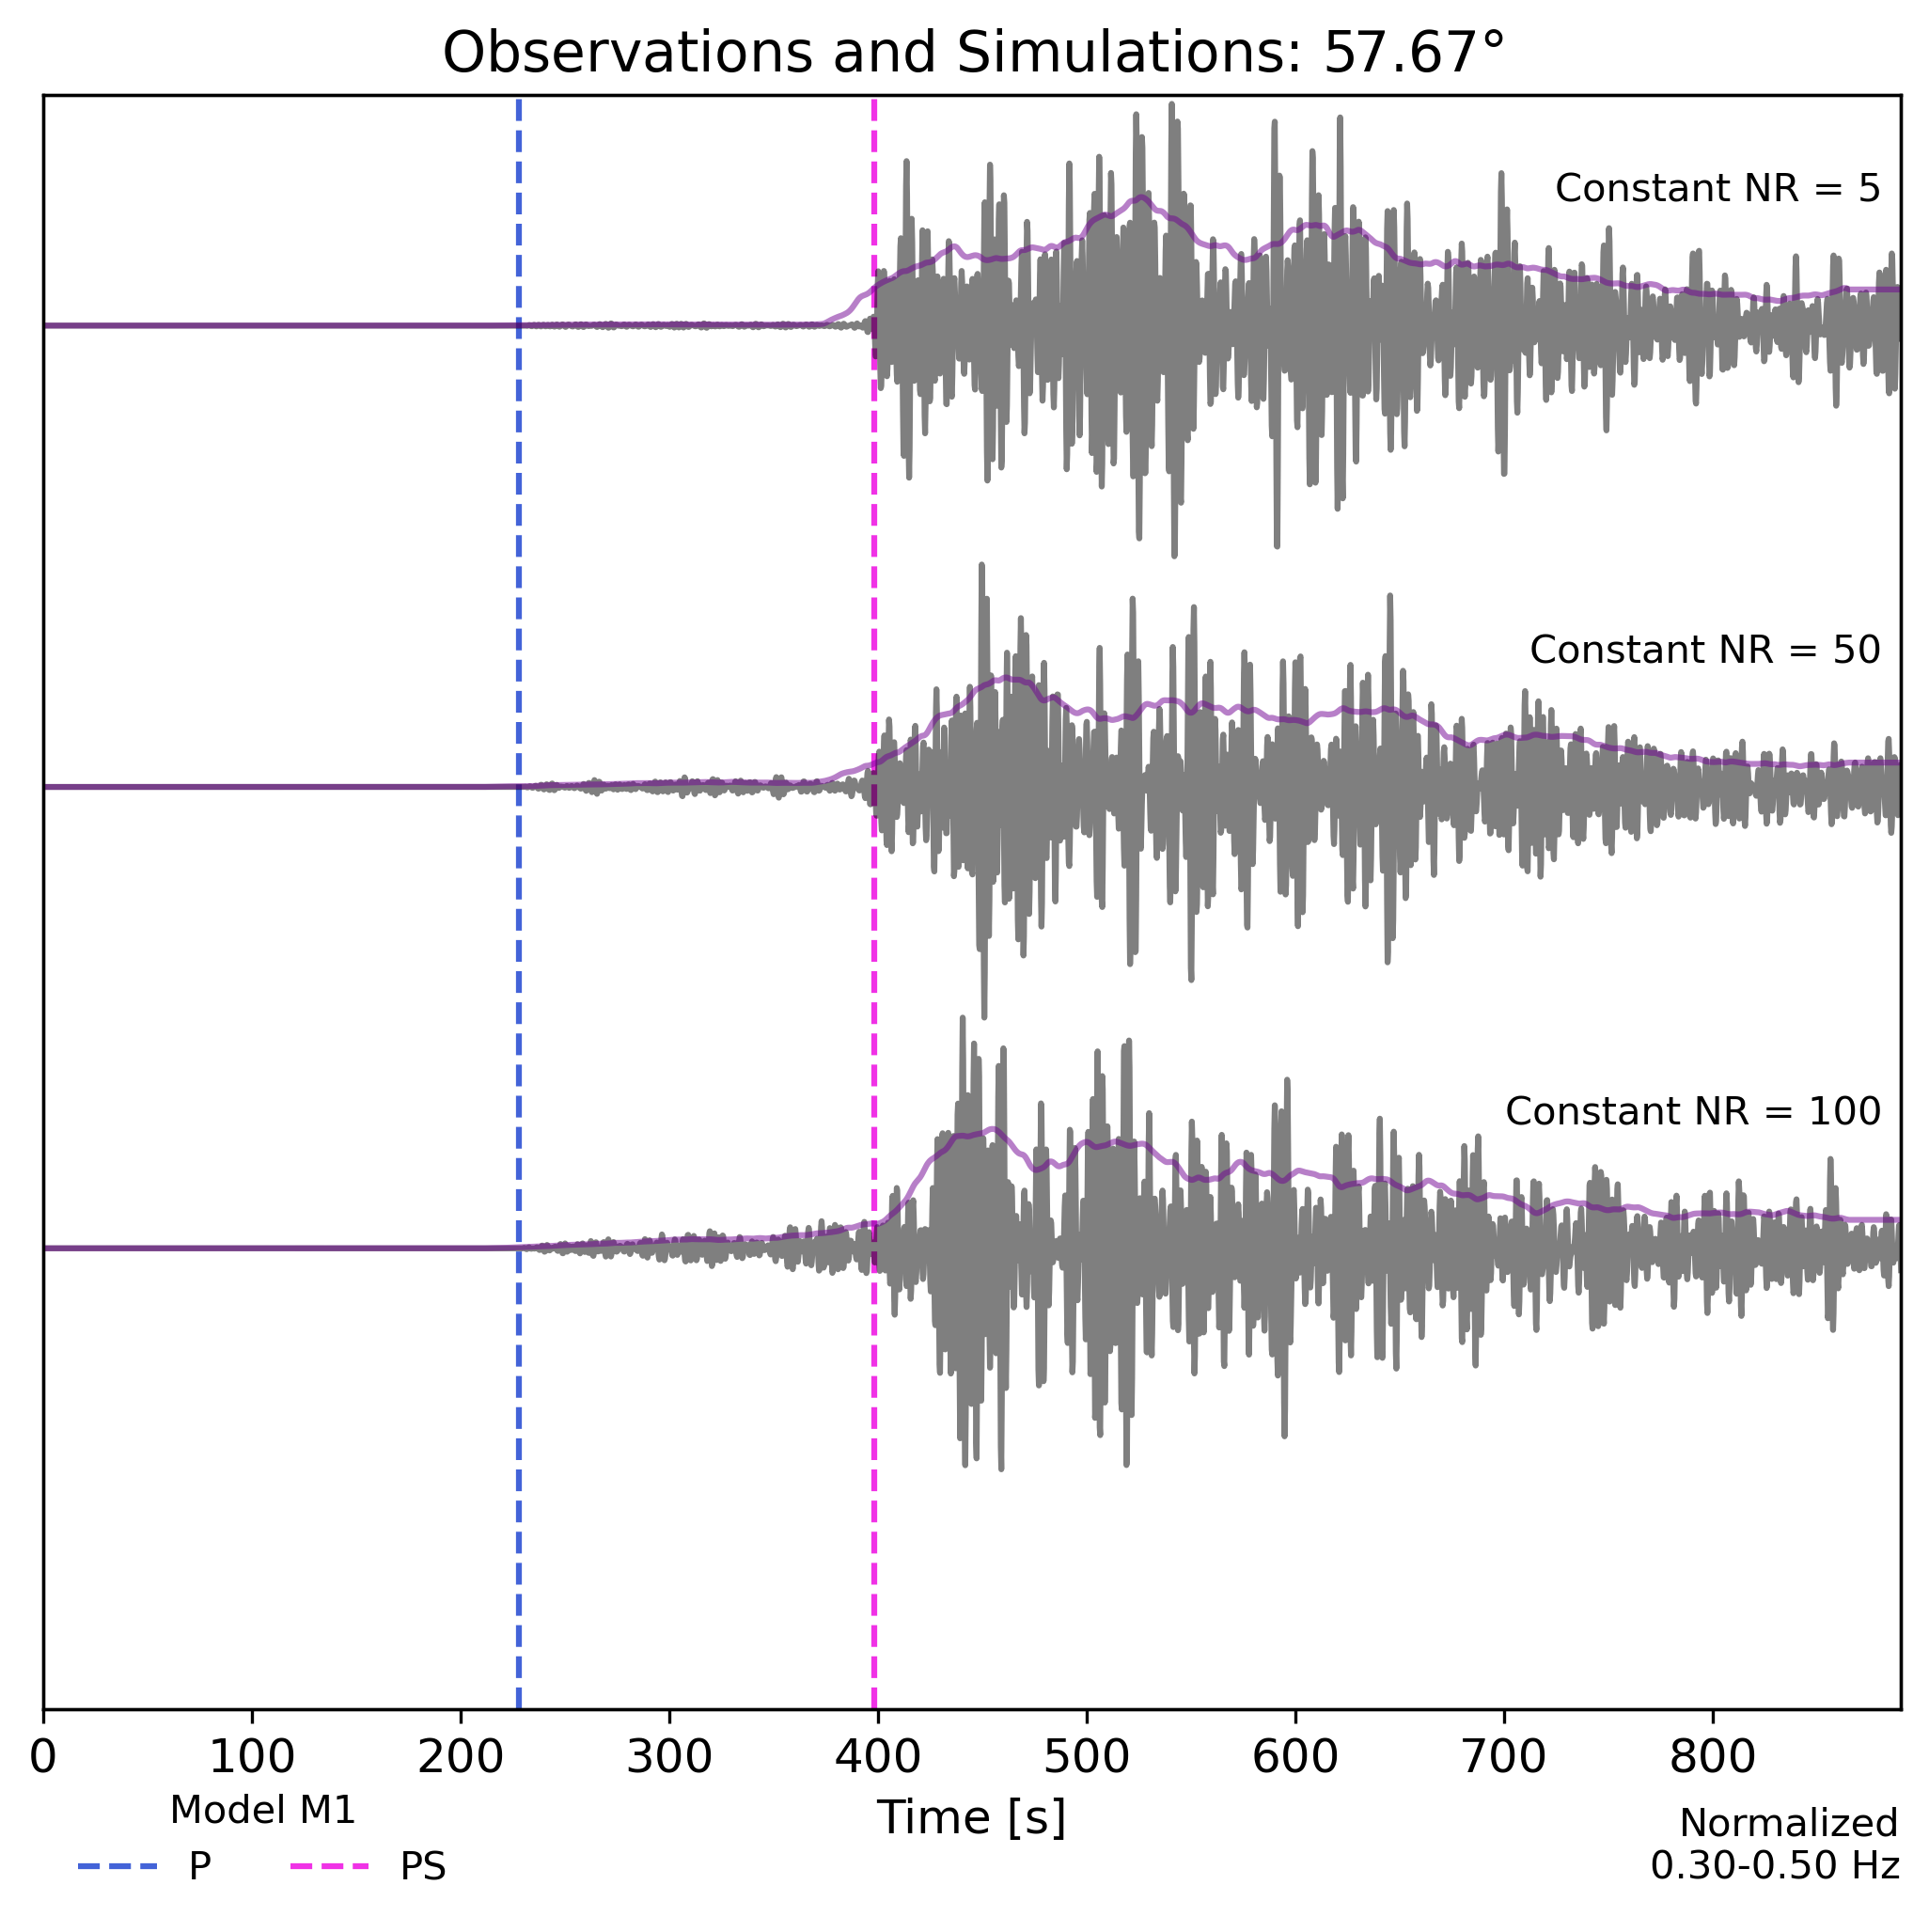

Calculated using model :  Model M1
0 1.062573155293401e-05
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 1.3224738883869329e-05
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 1.4077222837468171e-05
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 28.047339965833054
Suppressing secondary arrivals
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:18.849236Z.png


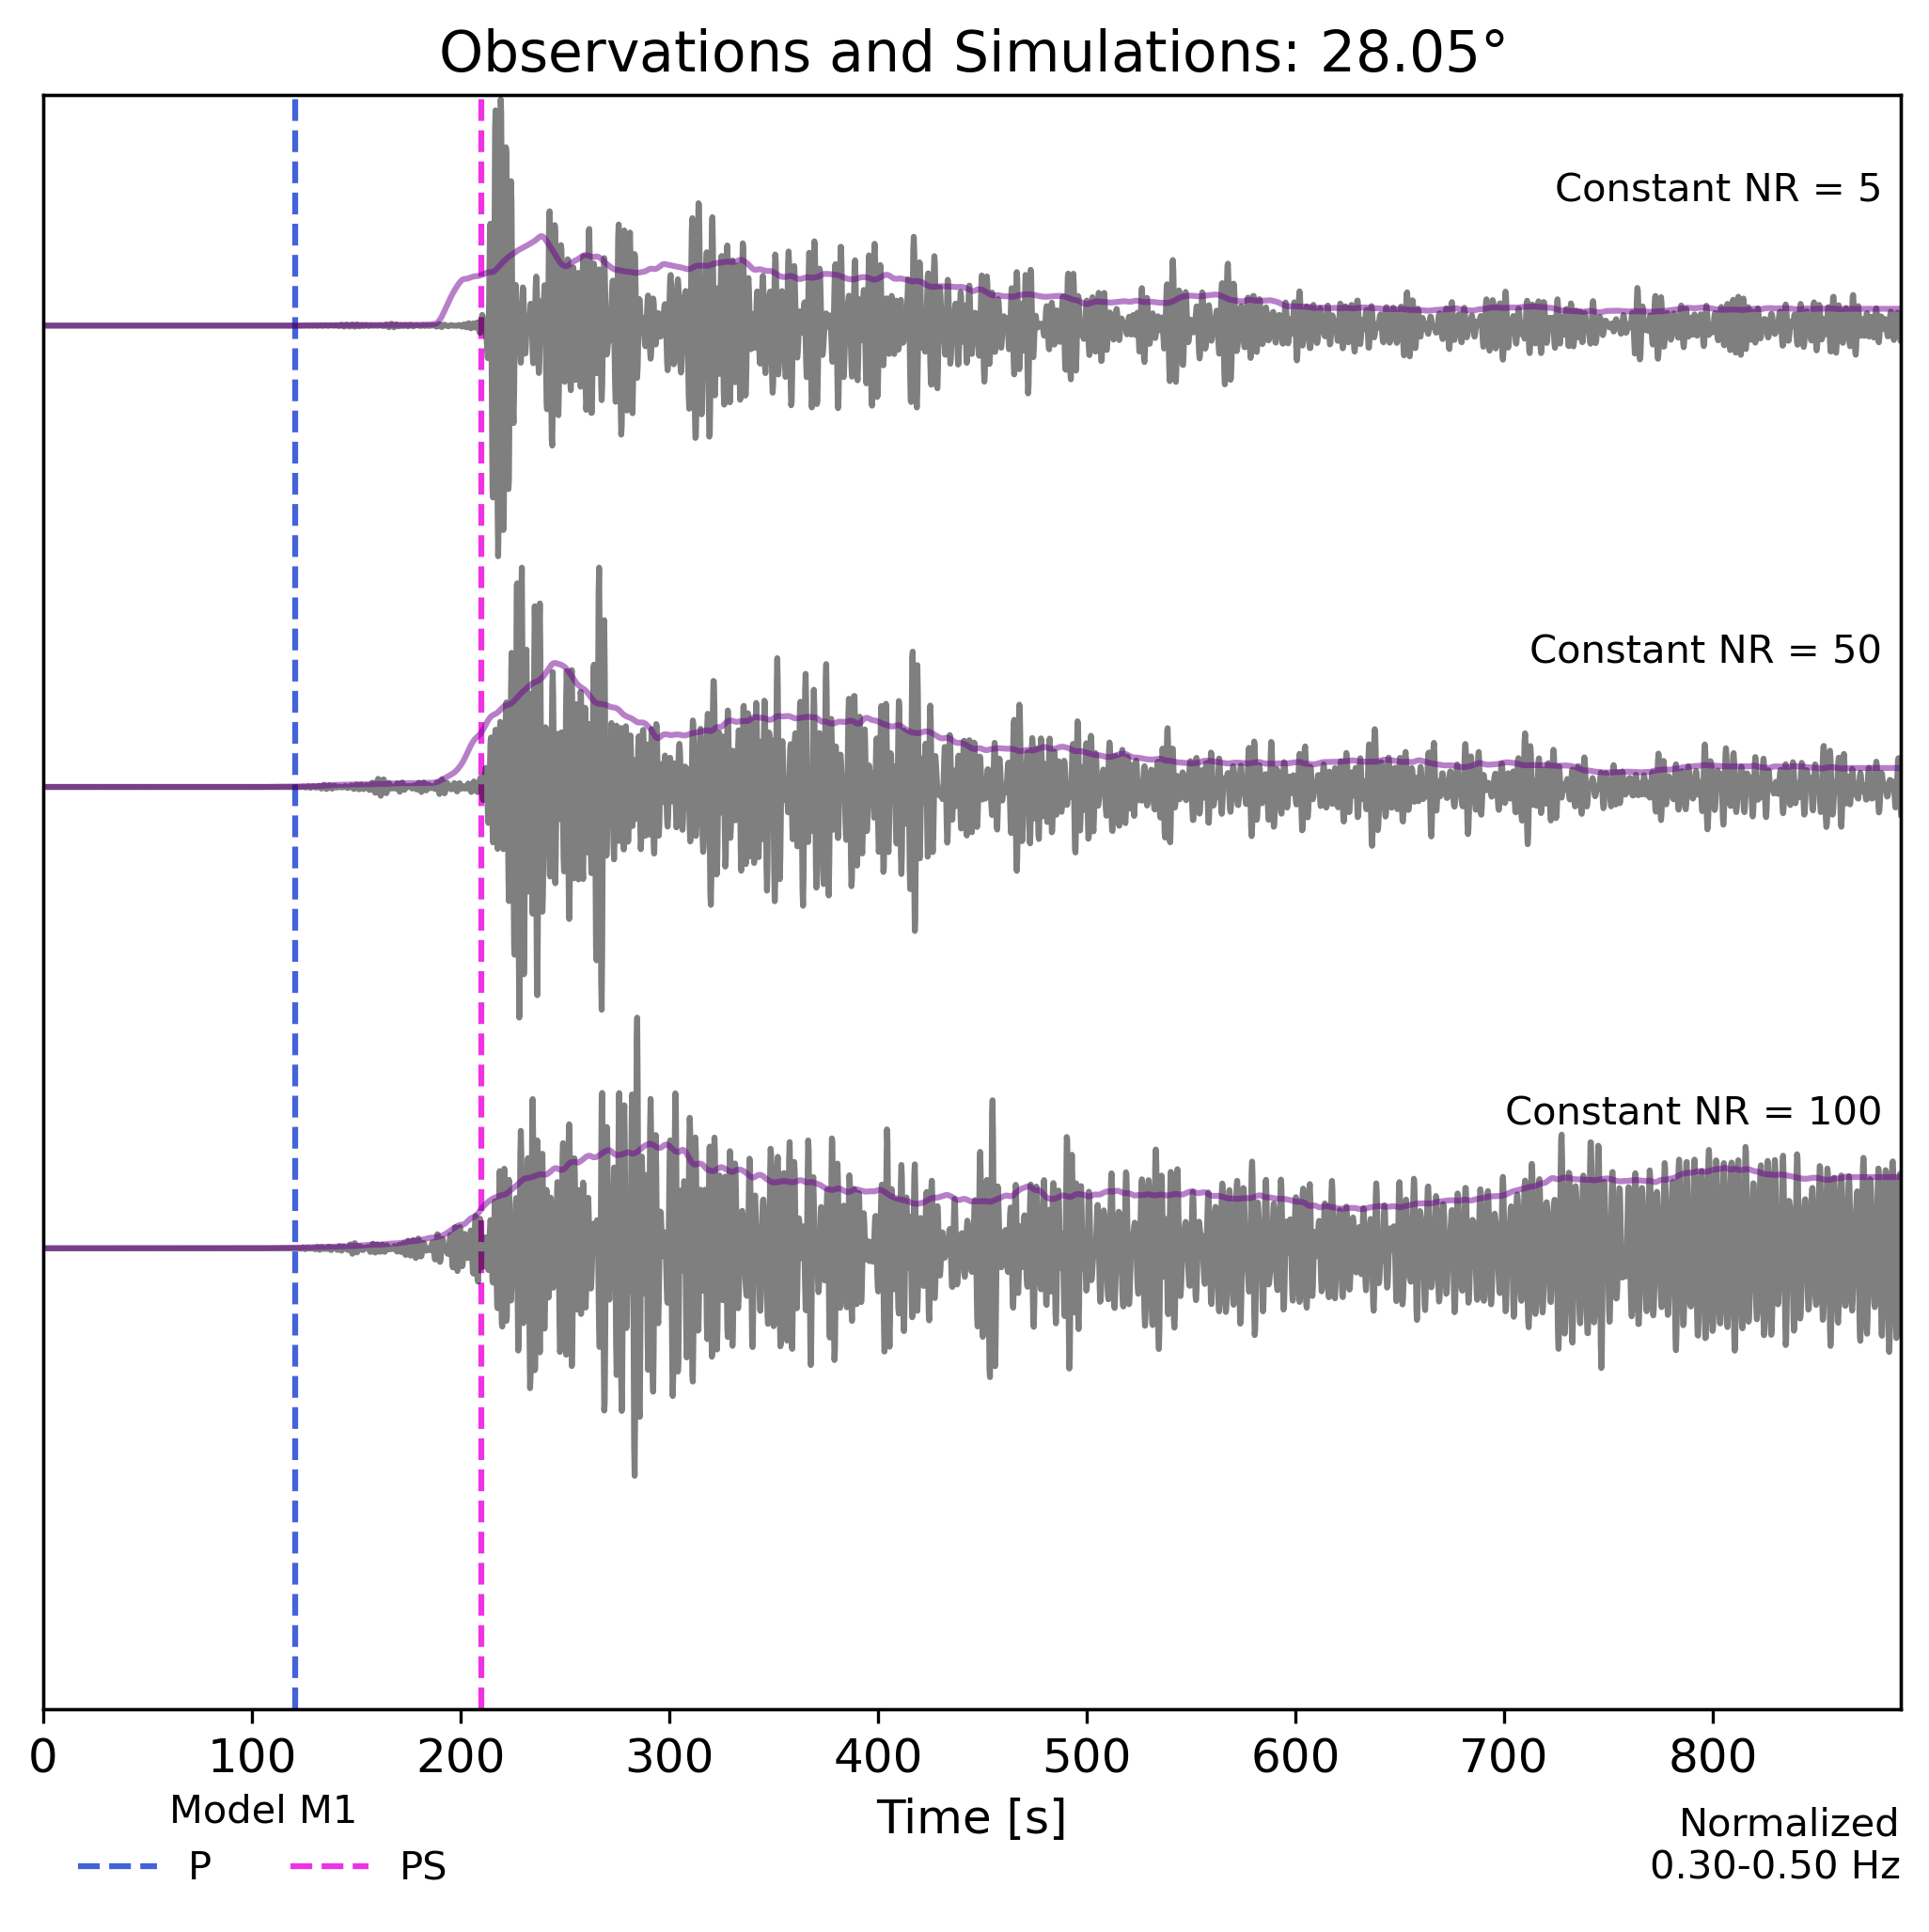

Calculated using model :  Model M1
0 0.0006060886422353755
Simulation: 140a_nr5_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
1 0.0005341398353431
Simulation: 140fw_n50constant_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
2 0.001128417894987725
Simulation: 140ew_n100constant_scan_ISSI_atten_linear80_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 2.167025997371414
Suppressing secondary arrivals
./temp/fig_2024-11-05T16:45:19.252449Z.png


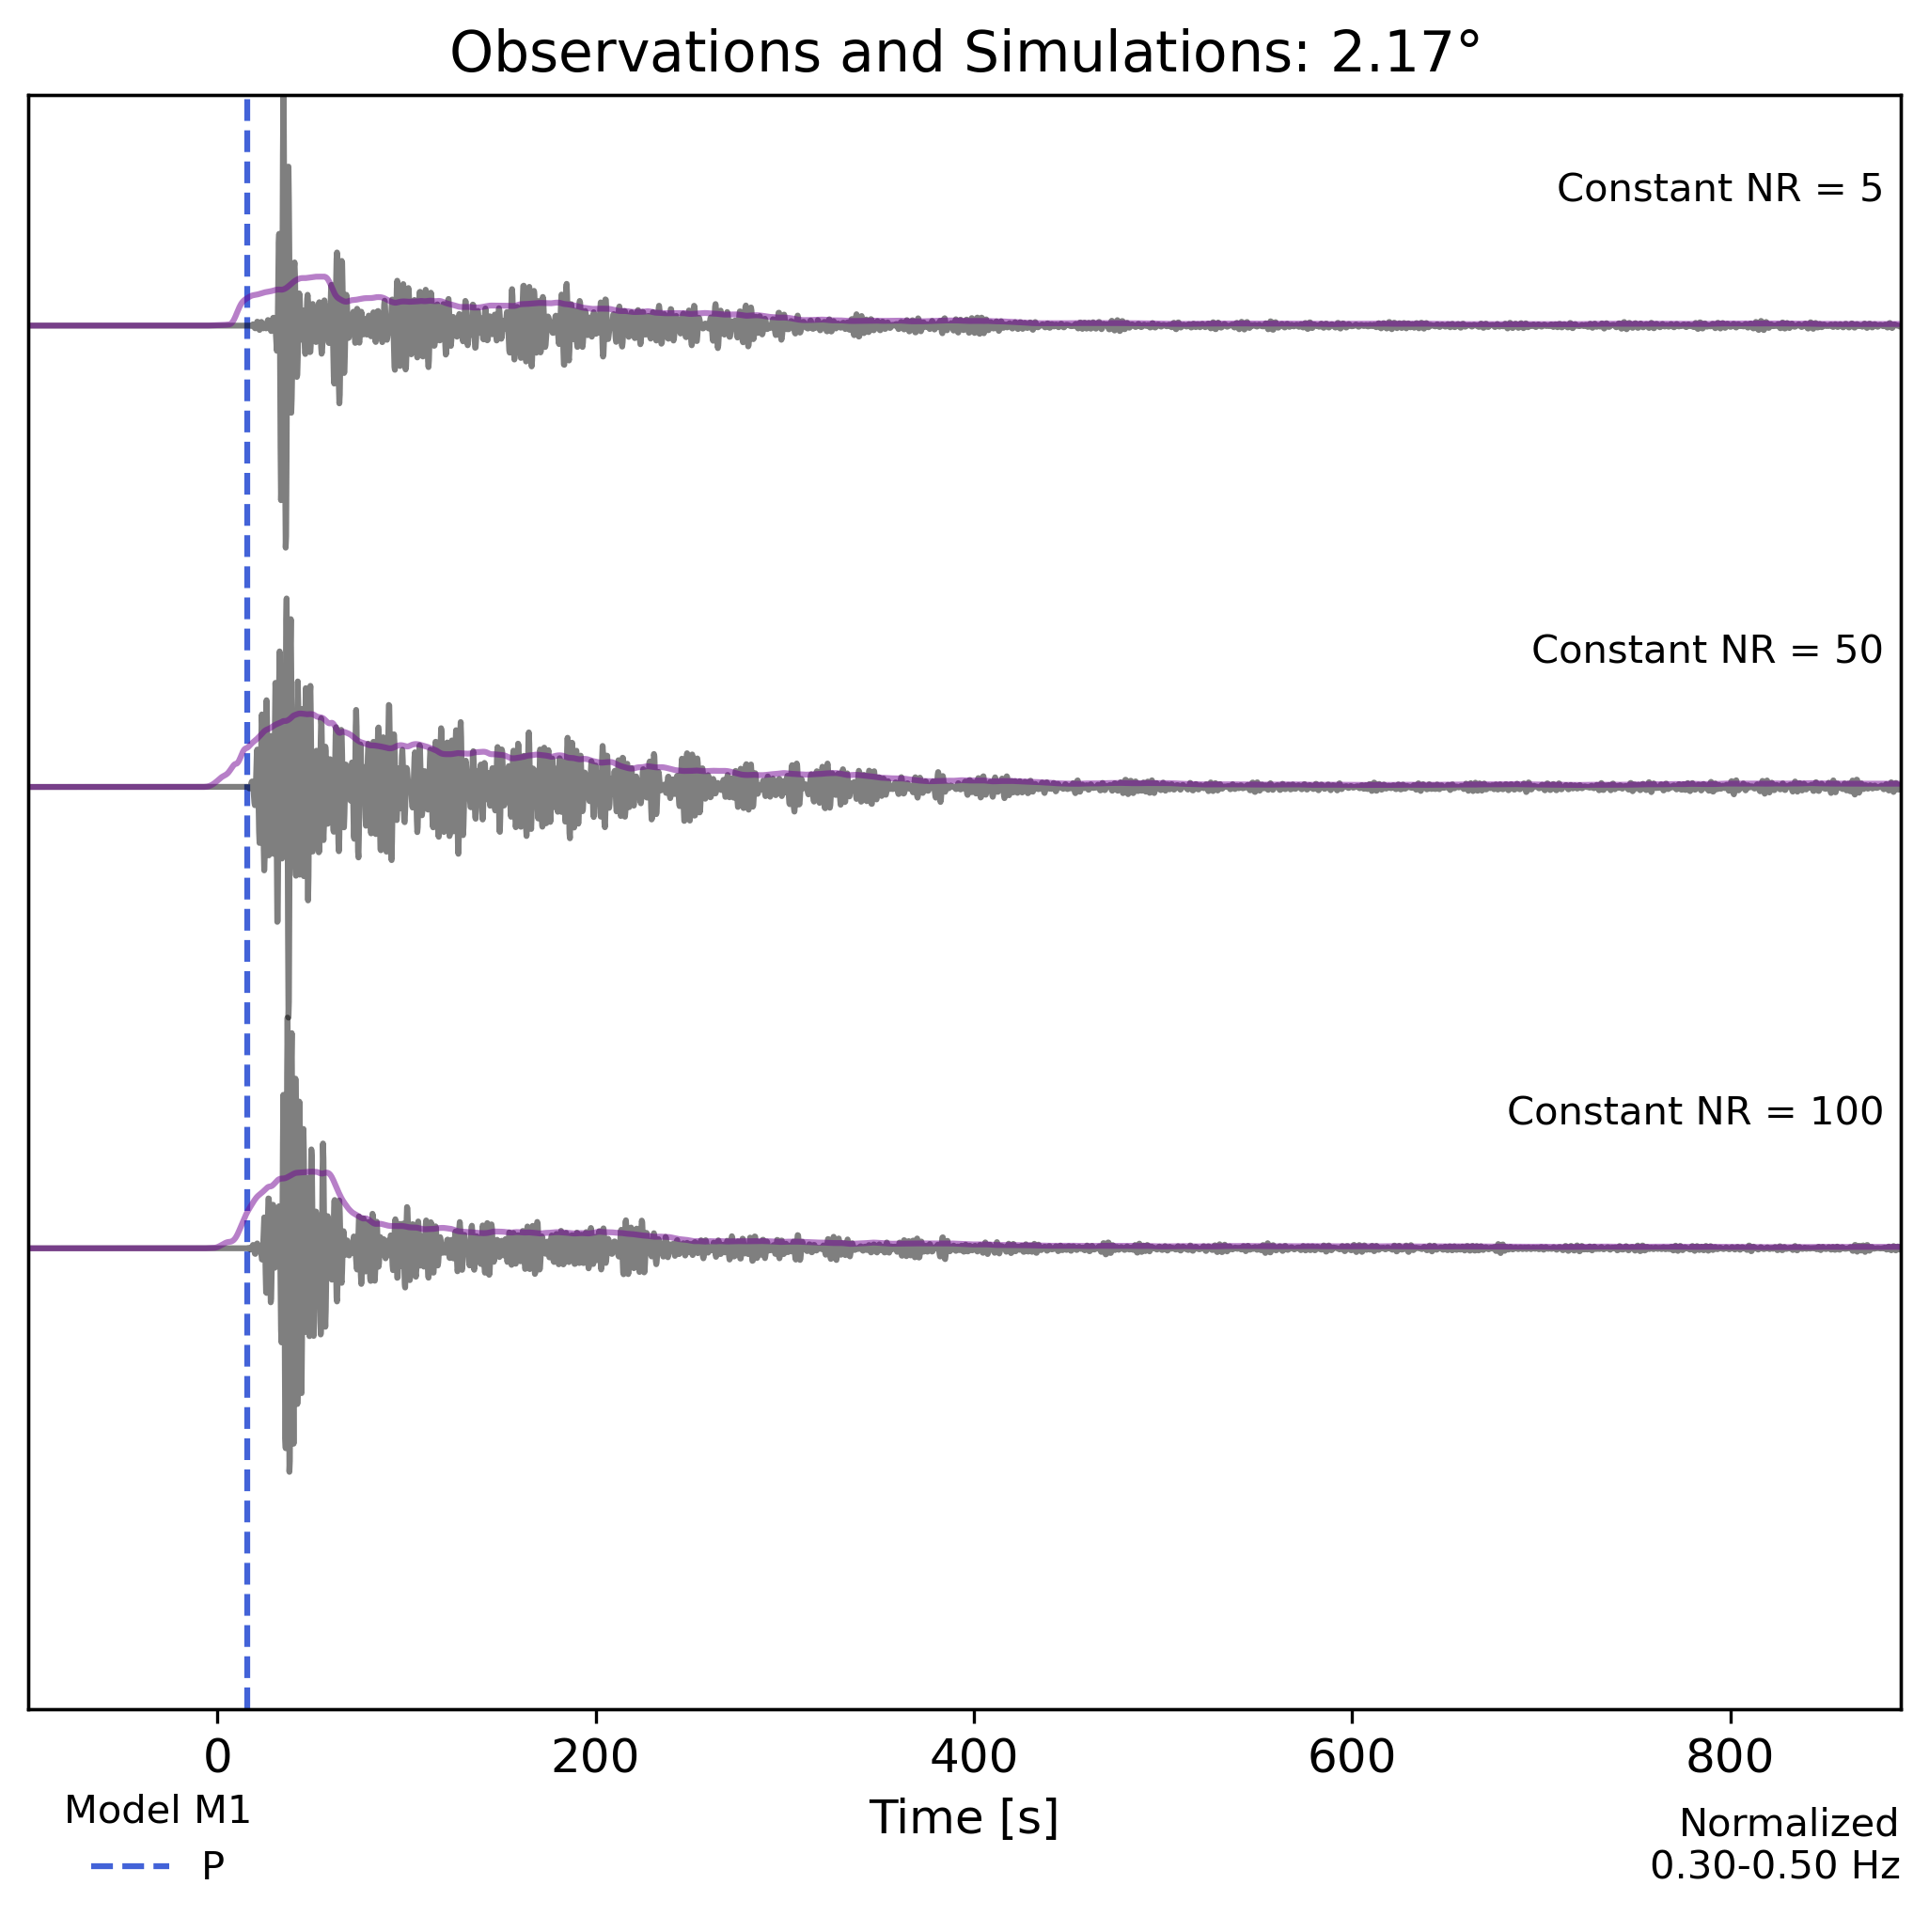

3 Trace(s) in Stream:
LM.LM14S14..T | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples
LM.LM14S14..T | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples
LM.LM14S14..T | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:14:50.121250Z | 4.1 Hz, 4014 samples

In [6]:
# Compare NR simulations - on the transverse component

run_list = [
'140a_nr5_ISSI_atten_linear80_2', 
'140fw_n50constant_ISSI_atten_linear80_2', 
'140ew_n100constant_scan_ISSI_atten_linear80_2',
]

freqmin=0.3
freqmax=0.5


scale_list = None


# original_observation_stream_local_MH

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[57],
                   inv=inv,
                    model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=890,channel='T',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope_one_color=True,
                              annotate_relative=False,
                              save_fig=True,figsize=(7,7 )
                             )


plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[28],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=890,channel='T',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,
                                           annotate_relative=False,
                           save_fig=True,figsize=(7,7 )
                             )


plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[2],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=890,channel='T',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,
                              annotate_relative=False,
                              save_fig=True,figsize=(7,7 )
                             )




## Section 4 - View histogram

In [7]:
# to rerun this section, you need to scanning_output_Nr.nc file from a run.
# these can be donwloaded from Zenodo
file1 = "/Users/cnunn/lunar_data/axisem3d_runs/140ew_n100constant_scan_ISSI_atten_linear80_2/simu3D/output/scanning_output_Nr.nc"
dataset = xr.open_dataset(file1)
# [print(var) for var in dataset.variables]



In [8]:
print(min(dataset.starting_Nr_for_scanning.values))
print(max(dataset.starting_Nr_for_scanning.values))

5.0
100.0


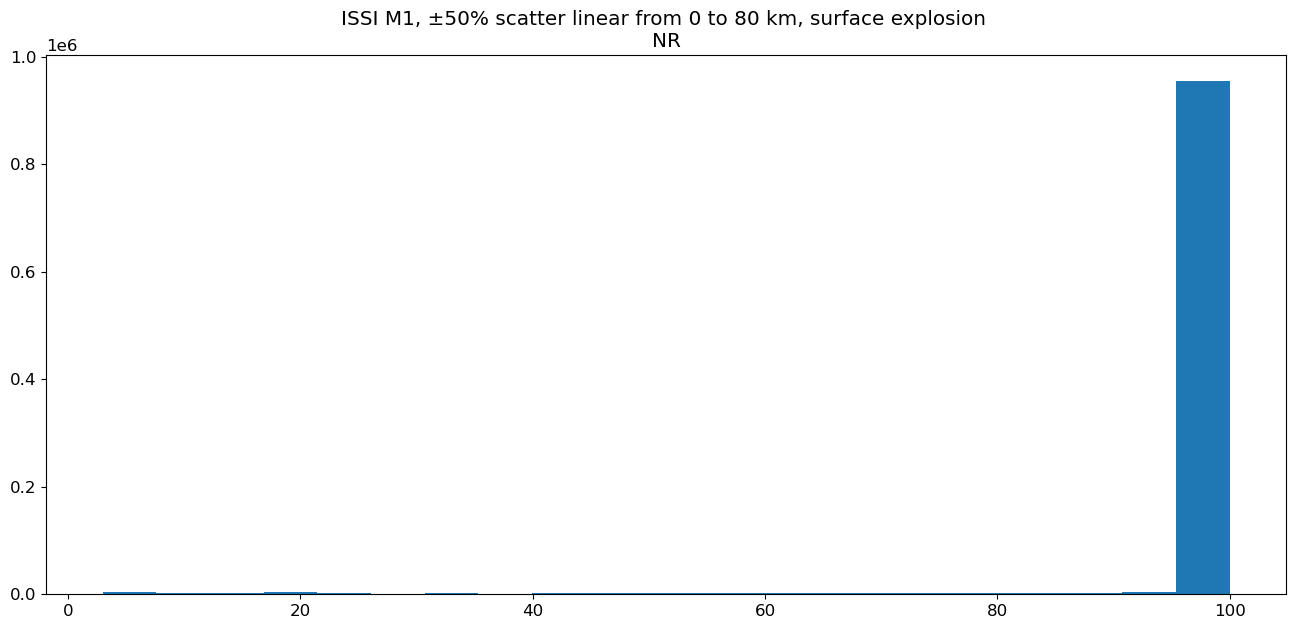

In [9]:
plt.hist(dataset.pointwise_Nr.values, bins='auto')  # arguments are passed to np.histogram
plt.title("ISSI M1, ±50% scatter linear from 0 to 80 km, surface explosion \nNR")
plt.show()